In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
data = pd.read_csv("C:\\Users\\PAWAN\\Downloads\\Project+2+-+Cars+Dataset.csv")
data.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


## 1. Data Understanding



What is the shape of the dataset (rows × columns)?



In [33]:
data.shape

(432, 15)

What are the data types of each column (categorical, numerical, etc.)?



In [34]:
data.dtypes

Make                   object
Model                  object
Type                   object
Origin                 object
DriveTrain             object
MSRP           string[python]
Invoice                object
EngineSize            float64
Cylinders             float64
Horsepower            float64
MPG_City              float64
MPG_Highway           float64
Weight                float64
Wheelbase             float64
Length                float64
dtype: object

Are there missing values? How many per column?



In [35]:
data.isnull().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

Are there duplicate rows or columns?



In [36]:
data.duplicated().sum()

np.int64(3)

What is the summary of numerical columns (mean, median, min, max, std)?



In [37]:
data.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


What is the distribution of categorical variables (e.g., car Make, Type, Origin)?

In [38]:
data.select_dtypes(include="object").columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'Invoice'], dtype='object')

In [39]:
data[["MSRP","Invoice"]]

,MSRP,Invoice
0,"$36,945","$33,337"
1,"$23,820","$21,761"
2,"$26,990","$24,647"
3,"$33,195","$30,299"
4,"$43,755","$39,014"
...,...,...
427,"$40,565","$38,203"
428,"$42,565","$40,083"
429,"$45,210","$42,573"
430,"$26,135","$24,641"


In [40]:
for i in data.drop(columns=["Invoice"]).select_dtypes(include="object").columns:
    
    print(f"{i}: {data[i].nunique()}")

Make: 38
Model: 425
Type: 6
Origin: 3
DriveTrain: 3


In [41]:
for i in data.select_dtypes(include="object").columns:
    
    print(data[i].value_counts())

Make
Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Nissan           17
Honda            17
Chrysler         15
Volkswagen       15
Mitsubishi       13
Dodge            13
Volvo            12
Hyundai          12
Jaguar           12
Subaru           11
Kia              11
Pontiac          11
Mazda            11
Lexus            11
Buick             9
Mercury           9
Lincoln           9
Cadillac          8
GMC               8
Saturn            8
Suzuki            8
Infiniti          8
Acura             7
Saab              7
Porsche           7
Land Rover        3
Oldsmobile        3
Jeep              3
Isuzu             2
MINI              2
Scion             2
Hummer            1
Name: count, dtype: int64
Model
G35 4dr                             2
C240 4dr                            2
C320 4dr                            2
RSX Type S 2dr                      1
TSX 4dr                             1
             

Visualize with bar plots

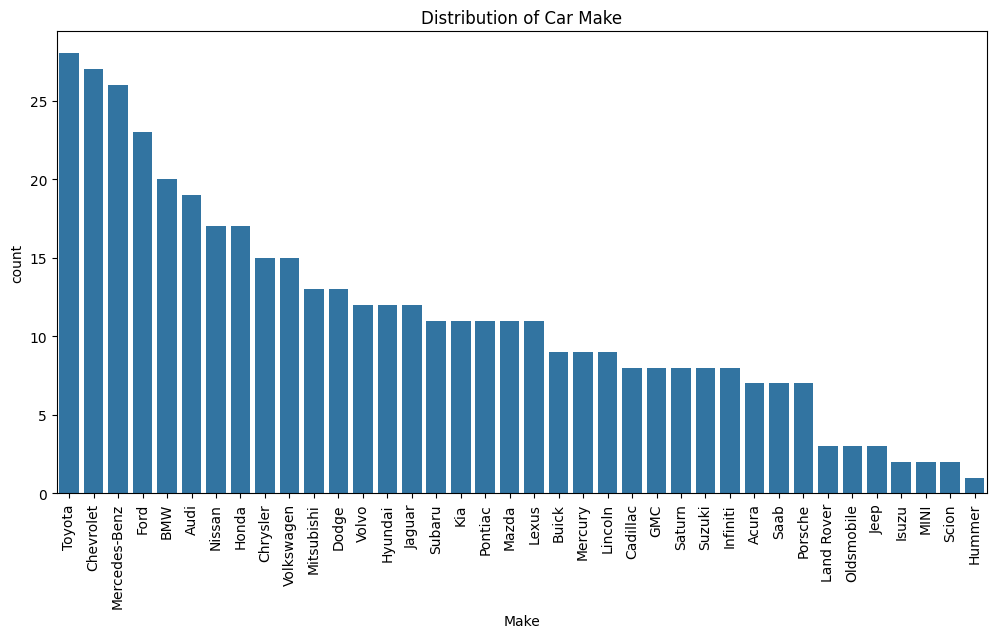

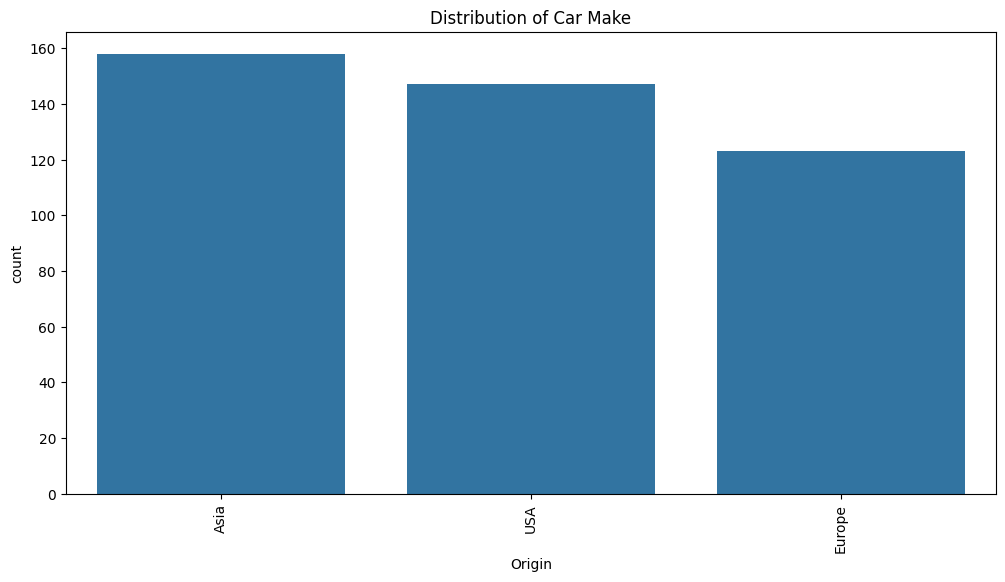

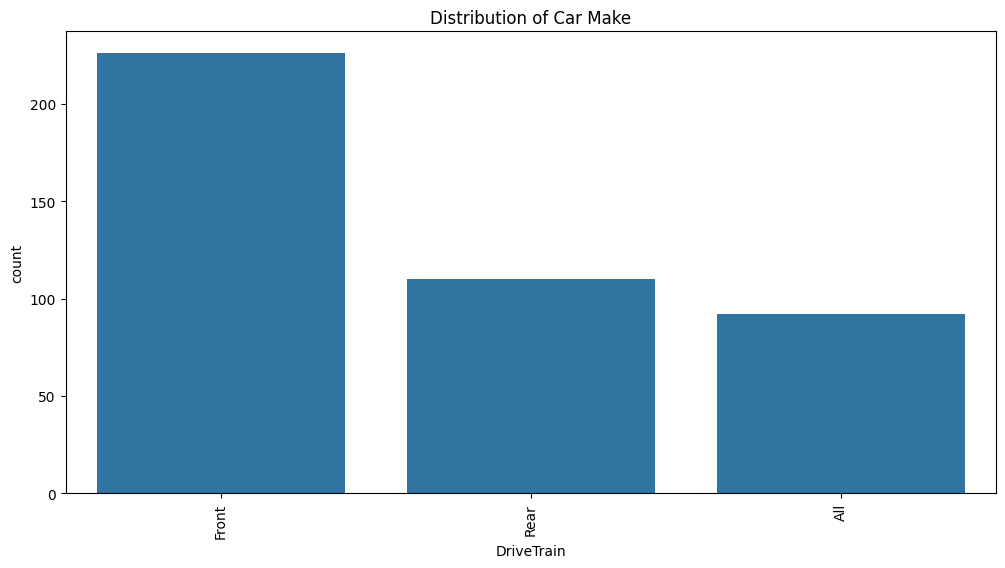

In [42]:
# plt.subplot(nrows, ncols, index)

plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Make', order=data['Make'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Car Make")
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Origin', order=data['Origin'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Car Make")
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=data, x='DriveTrain', order=data['DriveTrain'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Car Make")
plt.show()

2. Univariate Analysis (One variable at a time)

What is the most expensive car (MSRP) and the least expensive?



In [43]:
data["MSRP"]=data["MSRP"].convert_dtypes("float")

In [44]:
print("Most Expensive")
data[["Make","Model","MSRP"]][data["MSRP"]==data["MSRP"].max()]


Most Expensive


,Make,Model,MSRP
265,Mercedes-Benz,CL500 2dr,"$94,820"


In [45]:
print("Least Expensive")
data[["Make","Model","MSRP"]][data["MSRP"]==data["MSRP"].min()]

Least Expensive


,Make,Model,MSRP
210,Kia,Rio 4dr manual,"$10,280"


What is the most common car Type (SUV, Sedan, etc.)?



In [46]:
most_common_car_type=data["Type"].mode()[0]
print(f"Most Common Car Type: {most_common_car_type}")

Most Common Car Type: Sedan


What is the average horsepower, engine size, MPG, etc.?



In [47]:
avg_HP = data["Horsepower"].mean()
avg_engine_size = data["EngineSize"].mean()
avg_MPG_city = data["MPG_City"].mean()
avg_MPG_highway = data["MPG_Highway"].mean()

print(f"Average Horsepower {avg_HP}")
print(f"Average engine size {avg_engine_size}")
print(f"Average MPG city {avg_MPG_city}")
print(f"Average MPG highway {avg_MPG_highway}")

Average Horsepower 215.8855140186916
Average engine size 3.196728971962617
Average MPG city 20.060747663551403
Average MPG highway 26.843457943925234


Which Make (brand) has the most models?



In [52]:
data["Make"].value_counts().idxmax()

'Toyota'

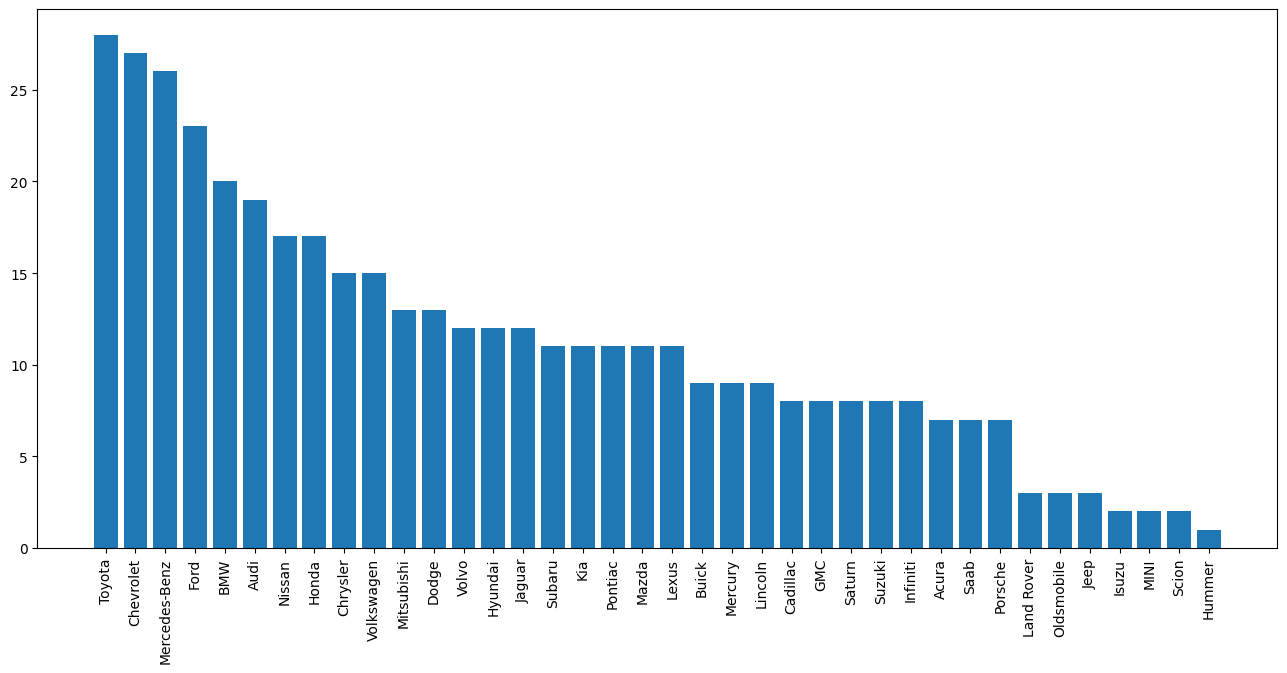

In [59]:
most_models = data["Make"].value_counts()
plt.figure(figsize=(16,7))
plt.bar(most_models.index,most_models.values)
plt.xticks(rotation=90)
plt.show()

Which Origin (USA, Asia, Europe) dominates the dataset?

In [60]:
data["Origin"].unique()

array(['Asia', 'Europe', nan, 'USA'], dtype=object)

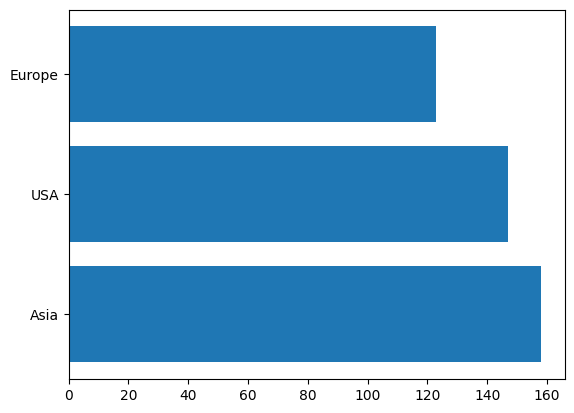

In [66]:
Origin = data["Origin"].value_counts()

plt.barh(Origin.index,Origin.values)
plt.show()